In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ACM Project/Dataset/Hinglish/Hinglish_train_14k_split_conll.txt', sep='\t', names=['word','type','class'])

In [4]:
df

,word,type,class
0,meta,4330,neutral
1,nen,Eng,NaN
2,á,O,NaN
3,vist,Eng,NaN
4,bolest,Eng,NaN
...,...,...,...
166125,t,Eng,NaN
166126,.,O,NaN
166127,co,Eng,NaN
166128,/,O,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166130 entries, 0 to 166129
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   word    166118 non-null  object
 1   type    166130 non-null  object
 2   class   6137 non-null    object
dtypes: object(3)
memory usage: 3.8+ MB


In [6]:
df1 = pd.DataFrame()

In [7]:
text=""
cla=""
cla=df['class'][0]
j=df['type'][0]
for i in range (1,len(df)):
  if (df['word'][i]=="meta"):
    df1= df1.append({"ID": j,"Text":text, "class": cla},ignore_index=True)
    cla = df["class"][i]
    j = df['type'][i]
    text=""
  else:
    text += " " + str(df['word'][i])
df1 = df1.append({"ID": j,"Text":text, "class": cla},ignore_index=True)


In [8]:
df1

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě ...,neutral
1,41616,@ nehantics Haan yaar neha 😔😔 kab karega woh ...,neutral
2,6648,@ RahulGandhi television media congress ke li...,negative
3,2512,@ AmitShah @ narendramodi All India me nrc la...,positive
4,610,@ Nehr _ who @ TypoMantri @ anjanaomkashyap P...,neutral
...,...,...,...
6132,31686,@ anandk2012 @ RailMinIndia @ IRCTCofficial @...,negative
6133,34552,so i couldn't get no one to cover me for my b...,positive
6134,16924,RT @ theskindoctor13 @ NajimKhan07 Aap logo k...,positive
6135,5556,@ PriyaVerma __ @ ashutosh83B Jay Jay Shree R...,positive


In [9]:
import re
from bs4 import BeautifulSoup

In [10]:
import numpy as np
import nltk
import string

In [11]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords as sw, wordnet as wn
from nltk.tokenize import word_tokenize

In [18]:
stopword_hinglish = pd.read_csv('/content/drive/MyDrive/ACM Project/Hinglish Stopwords.txt' , sep='\t')

In [19]:
stopword_hinglish

,a
0,aadi
1,aaj
2,aap
3,aapne
4,aata
...,...
1030,yours
1031,yourself
1032,yourselves
1033,you've


In [20]:
stopword = stopword_hinglish['a'].tolist()

In [21]:
stopword

['aadi',
 'aaj',
 'aap',
 'aapne',
 'aata',
 'aati',
 'aaya',
 'aaye',
 'ab',
 'abbe',
 'abbey',
 'abe',
 'abhi',
 'able',
 'about',
 'above',
 'accha',
 'according',
 'accordingly',
 'acha',
 'achcha',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 'agar',
 'ain',
 'aint',
 "ain't",
 'aisa',
 'aise',
 'aisi',
 'alag',
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'andar',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'ap',
 'apan',
 'apart',
 'apna',
 'apnaa',
 'apne',
 'apni',
 'appear',
 'are',
 'aren',
 'arent',
 "aren't",
 'around',
 'arre',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'aur',
 'avum',
 'aya',
 'aye',
 'baad',
 'baar',
 'bad',
 'bahut',
 'bana',
 'banae',
 'banai',
 'banao',
 'banaya',
 'banaye',
 'banayi',
 'banda',
 'bande',
 'bandi',
 'bane',
 'bani',
 'bas',
 'bata',
 'batao',
 

In [22]:
def func(txt):
  txt = re.sub('@ [\w]+'," ",txt)
  txt = BeautifulSoup(txt, 'lxml').get_text() #remove html tags
  txt = re.sub(r'https (//) [A-Za-z0-9. ]*(/) [A-Za-z0-9]+'," ",txt)
  txt = re.sub(r'\bRT\b'," ",txt)
  txt = re.sub(r'\bnan\b'," ",txt)
  tokens = word_tokenize(txt)
  tokens = [a.lower() for a in tokens]
  table = str.maketrans('','',string.punctuation)
  stripped = [a.translate(table) for a in tokens]
  words = [word for word in stripped if word.isalpha()]

  # stop_words = set(sw.words('english'))
  # words = [w for w in words if not w in stop_words]
  words = [w for w in words if not w in stopword]
  print(words)
  return words


for i in df1["Text"].index:
  df1["Text"][i] = func(df1.loc[i,"Text"])

df1

Output hidden; open in https://colab.research.google.com to view.

In [23]:
for i in df1["Text"].index:
  df1["Text"][i]=" ".join(df1["Text"][i])

In [24]:
df1

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě l...,neutral
1,41616,yaar neha post sach photoshoot phir post,neutral
2,6648,television media congress h aapko gya achha co...,negative
3,2512,india nrc lagu w kashmir dhara khatam ham indi...,positive
4,610,pagal real issues mandir important hindu khatr...,neutral
...,...,...,...
6132,31686,saale gaandu porn dikhta blame h,negative
6133,34552,nt cover birthday im open day guess okkk,positive
6134,16924,logo baat najim media walo bina janche parkhe ...,positive
6135,5556,jay jay shree ram ram rajye danavo rakshasho c...,positive


In [25]:
df = pd.read_csv('/content/drive/MyDrive/ACM Project/Dataset/Hinglish/Hinglish_dev_3k_split_conll.txt', sep='\t', names=['word','type','class'])
df

,word,type,class
0,meta,30258,positive
1,@,O,NaN
2,prahladspatel,Eng,NaN
3,modi,Eng,NaN
4,mantrimandal,Eng,NaN
...,...,...,...
81673,t,Eng,NaN
81674,.,O,NaN
81675,co,Eng,NaN
81676,/,O,NaN


In [26]:
df2 = pd.DataFrame()
text=""
cla=""
cla=df['class'][0]
j=df['type'][0]
for i in range (1,len(df)):
  if (df['word'][i]=="meta"):
    df2= df2.append({"ID": j,"Text":text, "class": cla},ignore_index=True)
    cla = df["class"][i]
    j = df['type'][i]
    text=""
  else:
    text += " " + str(df['word'][i])
df2 = df2.append({"ID": j,"Text":text, "class": cla},ignore_index=True)


In [27]:
df2

,ID,Text,class
0,30258,@ prahladspatel modi mantrimandal may samil h...,positive
1,16648,@ bkunalraj @ TajinderBagga @ NikhilJakhar14 ...,negative
2,28511,@ waglenikhil U saw caste and religion in the...,negative
3,10466,@ DelhiPolice sir local police station pe com...,neutral
4,19266,Ve Maahi song from # Kesari is current favour...,positive
...,...,...,...
2995,16859,RT @ SureshK73375546 @ MukeshSharmaMLA @ jite...,negative
2996,2294,Music is my life ...❤ Thank you to Chhote Ust...,neutral
2997,29819,@ vicky _ gilmour Hmmmm not really Sam is an ...,neutral
2998,34181,@ rssurjewala @ INCIndia Ab gala faad ke nahi...,negative


In [28]:

for i in df2["Text"].index:
  df2["Text"][i] = func(df2.loc[i,"Text"])

df2

['modi', 'mantrimandal', 'samil', 'honay', 'badhai', 'narmaday']
['rashid', 'naamakool', 'mare', 'h']
['u', 'caste', 'religion', 'nation', 'talent', 'trust', 'problem', 'paida', 'ulte']
['sir', 'local', 'police', 'station', 'complaint', 'bi', 'sunwai', 'mene', 'complaint', 'karwai']
['maahi', 'song', 'kesari', 'current', 'favourite', 'music', 'melody', 'arijitsingh', 'favouri']
['boy', 'matters', 'uhh', 'love', 'a', 'lot']
['sarwatjee', 'wednesday', 'muqabil', 'opening', 'speech', 'behatreen', 'lagee', 'expression']
['deodhar', 'today', 'speeches', 'ji', 'spoke', 'a', 'statesmen', 'dedicated', 'victory', 'p']
['aapke', 'shubh', 'chintakk', 'lalit', 'jaiswal', 'taraf', 'aapko', 'aapki', 'jeet', 'hardik', 'subhkamnaye']
['pasand', 'answer', 'wish', 'win', 'pakvswi', 'wivspak', 'pakvswi', 'pakvwi', 'wivpak']
['pledgeagainstcorruption', 'afternoon', 'guru', 'g', 'bless', 'give', 'power', 'sewa']
['kartavy', 'watan', 'imaan', 'watan', 'dil', 'juda', 'ham', 'payege', 'gar', 'toofan', 'raaho'

,ID,Text,class
0,30258,"[modi, mantrimandal, samil, honay, badhai, nar...",positive
1,16648,"[rashid, naamakool, mare, h]",negative
2,28511,"[u, caste, religion, nation, talent, trust, pr...",negative
3,10466,"[sir, local, police, station, complaint, bi, s...",neutral
4,19266,"[maahi, song, kesari, current, favourite, musi...",positive
...,...,...,...
2995,16859,"[khushi, nayi, sarkaar, naye, kaam, saal, bhas...",negative
2996,2294,"[music, life, chhote, ustad, salman, ali, post...",neutral
2997,29819,"[gilmour, hmmmm, sam, outlaw, admire]",neutral
2998,34181,"[gala, faad, chillana, chowkidaar, chor, sharm...",negative


In [29]:
for i in df2["Text"].index:
  df2["Text"][i]=" ".join(df2["Text"][i])

In [30]:
df2

,ID,Text,class
0,30258,modi mantrimandal samil honay badhai narmaday,positive
1,16648,rashid naamakool mare h,negative
2,28511,u caste religion nation talent trust problem p...,negative
3,10466,sir local police station complaint bi sunwai m...,neutral
4,19266,maahi song kesari current favourite music melo...,positive
...,...,...,...
2995,16859,khushi nayi sarkaar naye kaam saal bhashn sun sun,negative
2996,2294,music life chhote ustad salman ali posting ins...,neutral
2997,29819,gilmour hmmmm sam outlaw admire,neutral
2998,34181,gala faad chillana chowkidaar chor sharm aayi ...,negative


In [31]:
frames = [df1,df2]
df3 = pd.concat(frames)


In [32]:
df3

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě l...,neutral
1,41616,yaar neha post sach photoshoot phir post,neutral
2,6648,television media congress h aapko gya achha co...,negative
3,2512,india nrc lagu w kashmir dhara khatam ham indi...,positive
4,610,pagal real issues mandir important hindu khatr...,neutral
...,...,...,...
2995,16859,khushi nayi sarkaar naye kaam saal bhashn sun sun,negative
2996,2294,music life chhote ustad salman ali posting ins...,neutral
2997,29819,gilmour hmmmm sam outlaw admire,neutral
2998,34181,gala faad chillana chowkidaar chor sharm aayi ...,negative


In [33]:
 df3.to_csv('/content/drive/MyDrive/ACM Project/data.csv',index=False)

In [34]:
df = pd.read_csv('/content/drive/MyDrive/ACM Project/data.csv')
df

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě l...,neutral
1,41616,yaar neha post sach photoshoot phir post,neutral
2,6648,television media congress h aapko gya achha co...,negative
3,2512,india nrc lagu w kashmir dhara khatam ham indi...,positive
4,610,pagal real issues mandir important hindu khatr...,neutral
...,...,...,...
9132,16859,khushi nayi sarkaar naye kaam saal bhashn sun sun,negative
9133,2294,music life chhote ustad salman ali posting ins...,neutral
9134,29819,gilmour hmmmm sam outlaw admire,neutral
9135,34181,gala faad chillana chowkidaar chor sharm aayi ...,negative


In [35]:
df[df['Text']==""]

,ID,Text,class


In [36]:
df[df['Text'].isnull()]

,ID,Text,class
70,15581,NaN,neutral
278,20445,NaN,neutral
299,13499,NaN,neutral
566,13432,NaN,neutral
635,42081,NaN,neutral
678,16231,NaN,neutral
1199,43574,NaN,neutral
1912,42731,NaN,neutral
1943,13983,NaN,neutral
2721,3444,NaN,positive


In [37]:
for i in range(len(df)):
    if(type(df['Text'][i]) !=str):
        df['Text'][i] = df['class'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# **Count** **Vectorizer**

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [105]:

vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 1))
features = vectorizer.fit_transform(df['Text'])
sentiment = df['class']

In [106]:


X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = True
       )

In [107]:
X_train.shape

(7524, 37877)

In [108]:
X_test.shape

(1613, 37877)

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV

In [110]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)

print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5350278983261004
F1-Score =  0.5376526617125014
[[247 172  50]
 [147 313 142]
 [ 66 173 303]]


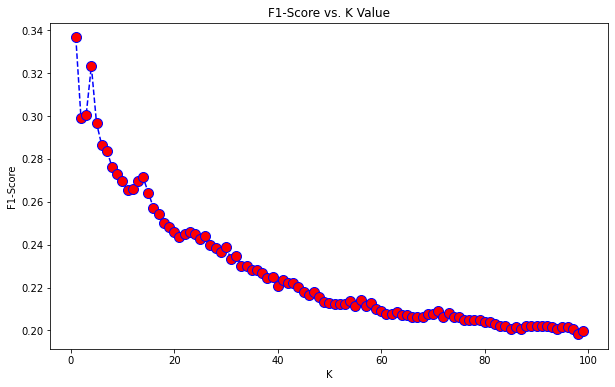

Best K value =  1


In [111]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/content/drive/MyDrive/ACM Project/k_data2-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4314941103533788
F1-Score =  0.3365880495332327
[[ 32 422  15]
 [ 14 540  48]
 [ 10 408 124]]


In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
dtree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

In [115]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [116]:
y_pred = dtree_model.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5579665220086795
F1-Score =  0.561198009443021
[[270 144  55]
 [134 302 166]
 [ 55 159 328]]


In [118]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.41475511469311843
F1-Score =  0.33544330548589013
[[332 136   1]
 [265 337   0]
 [144 398   0]]


In [119]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4823310601363918
F1-Score =  0.42929316397721196
[[315 152   2]
 [174 417  11]
 [ 71 425  46]]


In [120]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 0, class_weight='balanced')
best_clf = log_model.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5771853688778673
F1-Score =  0.5806101744417481
[[268 165  36]
 [129 334 139]
 [ 54 159 329]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [121]:


param_grid = [
              {'penalty' : ['l1','l2',],
               'C' : np.logspace(-4,4,20),
               'max_iter' : [100,1000,2500,5000,]
               }
]
clf = GridSearchCV(log_model, param_grid = param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)


Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 15.2min finished


In [ ]:
best_clf.best_estimator_

In [ ]:
y_pred = best_clf.best_estimator_.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state = 0, class_weight='balanced')

In [ ]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

# **TF-IDF Vectorizer**

In [61]:
df = pd.read_csv('/content/drive/MyDrive/ACM Project/data.csv')
df

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě l...,neutral
1,41616,yaar neha post sach photoshoot phir post,neutral
2,6648,television media congress h aapko gya achha co...,negative
3,2512,india nrc lagu w kashmir dhara khatam ham indi...,positive
4,610,pagal real issues mandir important hindu khatr...,neutral
...,...,...,...
9132,16859,khushi nayi sarkaar naye kaam saal bhashn sun sun,negative
9133,2294,music life chhote ustad salman ali posting ins...,neutral
9134,29819,gilmour hmmmm sam outlaw admire,neutral
9135,34181,gala faad chillana chowkidaar chor sharm aayi ...,negative


In [62]:
df[df['Text']==""]

,ID,Text,class


In [63]:
df[df['Text'].isnull()]

,ID,Text,class
70,15581,NaN,neutral
278,20445,NaN,neutral
299,13499,NaN,neutral
566,13432,NaN,neutral
635,42081,NaN,neutral
678,16231,NaN,neutral
1199,43574,NaN,neutral
1912,42731,NaN,neutral
1943,13983,NaN,neutral
2721,3444,NaN,positive


In [64]:
for i in range(len(df)):
    if(type(df['Text'][i]) !=str):
        df['Text'][i] = df['class'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
features2 = tfidf.fit_transform(df['Text'])

In [66]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

In [48]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)

print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5430874147551147
F1-Score =  0.5471764184487056
[[253 179  40]
 [157 313 144]
 [ 52 165 310]]


In [ ]:
param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf', 'linear', ]
}
grid = GridSearchCV(svm.SVC(), param_grid= param_grid, refit=True, verbose= 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.393, total=  12.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.387, total=  11.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.384, total=  12.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.385, total=  12.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.388, total=  12.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.490, total=  10.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.473, total=  10.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.494, total=  10.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.506, total=  10.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 46.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5846249225046497
F1-Score =  0.5889203226988321
[[274 165  33]
 [140 338 136]
 [ 43 153 331]]


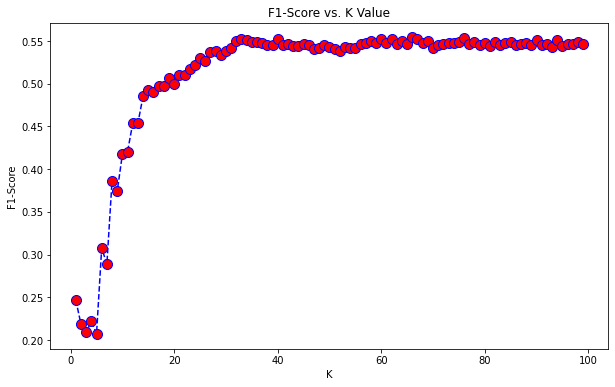

Best K value =  66


In [50]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/content/drive/MyDrive/ACM Project/k_data2-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5530068195908245
F1-Score =  0.5542239170789093
[[223 197  52]
 [125 332 157]
 [ 29 161 337]]


In [52]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5108493490390577
F1-Score =  0.5149544370376136
[[265 145  62]
 [171 270 173]
 [ 60 178 289]]


In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.43769373837569747
F1-Score =  0.4344164196831278
[[234 119 119]
 [198 174 242]
 [110 119 298]]


In [67]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5697458152510849
F1-Score =  0.568062105796544
[[208 213  51]
 [ 87 374 153]
 [ 24 166 337]]


In [68]:
params = {'alpha' : [0.01, 0.1, 0.5, 1.0, 10.0,],
          }
multi_nb_grid = GridSearchCV(MNB, param_grid= params, n_jobs=-1, cv=20, verbose=20)
multi_nb_grid.fit(X_train, y_train)  


Fitting 20 folds for each of 5 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(cv=20, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=20)

In [69]:
y_pred = multi_nb_grid.best_estimator_.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5697458152510849
F1-Score =  0.568062105796544
[[208 213  51]
 [ 87 374 153]
 [ 24 166 337]]


In [70]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5567265964042157
F1-Score =  0.5603983778343634
[[262 165  45]
 [169 305 140]
 [ 46 150 331]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [71]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state = 0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
# duration = time.time()-start_time
# print(duration/60, " minutes")


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5523868567885927
F1-Score =  0.5543891031106036
[[221 219  32]
 [104 377 133]
 [ 28 206 293]]


# **Word2Vec**

In [73]:
df = pd.read_csv('/content/drive/MyDrive/ACM Project/data.csv')
df

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě l...,neutral
1,41616,yaar neha post sach photoshoot phir post,neutral
2,6648,television media congress h aapko gya achha co...,negative
3,2512,india nrc lagu w kashmir dhara khatam ham indi...,positive
4,610,pagal real issues mandir important hindu khatr...,neutral
...,...,...,...
9132,16859,khushi nayi sarkaar naye kaam saal bhashn sun sun,negative
9133,2294,music life chhote ustad salman ali posting ins...,neutral
9134,29819,gilmour hmmmm sam outlaw admire,neutral
9135,34181,gala faad chillana chowkidaar chor sharm aayi ...,negative


In [74]:
df[df['Text'].isnull()]

,ID,Text,class
70,15581,NaN,neutral
278,20445,NaN,neutral
299,13499,NaN,neutral
566,13432,NaN,neutral
635,42081,NaN,neutral
678,16231,NaN,neutral
1199,43574,NaN,neutral
1912,42731,NaN,neutral
1943,13983,NaN,neutral
2721,3444,NaN,positive


In [75]:
for i in range(len(df)):
    if(type(df['Text'][i]) !=str):
        df['Text'][i] = df['class'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
from gensim.models import Word2Vec


In [77]:
tokenized_tweet = df['Text'].apply(lambda x: x.split()) # tokenizing

model_w2v = Word2Vec(tokenized_tweet, size=300,  window=5, min_count=1)
model_w2v.train(tokenized_tweet, total_examples= len(df['Text']), epochs=20)

(2011612, 6999340)

In [78]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:

        vec += model_w2v[word].reshape((1, size))
        count += 1.

    if count != 0:
        vec /= count
    return vec

In [79]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 300))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 300)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(9137, 300)

In [80]:
d = {}
d['negative'] = [1., 0., 0.]
d['neutral'] = [0., 1., 0.]
d['positive']  = [0., 0., 1.]

In [81]:
out=[]

In [82]:

for i in df['class']:
    out.append(d[i])
out = np.array(out)

In [83]:

sentiment = df['class']
X_train, X_valid, y_train, y_valid  = train_test_split(
        wordvec_arrays, 
        out,
        train_size=0.85, 
        shuffle = False
       )

In [84]:
sentiment = df['class']
X_train, X_test, y_train, y_test  = train_test_split(
        X_train, 
        y_train,
        train_size=0.82352942, 
        shuffle = False
       )

In [85]:

def show_results(nn_model_train,s): # plot performance over the training epochs
  accuracy     = nn_model_train.history['accuracy']
  val_accuracy = nn_model_train.history['val_accuracy']
  loss         = nn_model_train.history['loss']
  val_loss     = nn_model_train.history['val_loss']
  epochs       = range(len(accuracy))
  nb_epochs    = len(epochs)

  f2 = plt.figure(2)
  plt.figure(figsize = (30,10))

  plt.subplot(2,1,1)
  plt.axis((0,nb_epochs,0.4,0.8))
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(2,1,2)
  plt.axis((0,nb_epochs,0.8,1.0))
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.savefig('/content/drive/MyDrive/ACM Project/EX-6'+s+'.png',bbox_inches='tight')
  plt.draw()
  plt.pause(0.001)

In [86]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

In [87]:
batch_size  = 64
epochs      = 50
learning_rate = 0.0001

model = keras.Sequential()

nr_hidden = 300
nr_in     = 300
nr_out    = 3 
model.add(Dense(nr_in,activation='relu'))
model.add(Dense(nr_hidden, activation = 'relu'))
model.add(Dense(nr_hidden, activation = 'relu'))
model.add(Dense(nr_hidden-100, activation = 'relu'))
model.add(Dense(nr_hidden-100, activation = 'relu'))
model.add(Dense(nr_hidden-200, activation = 'relu'))
model.add(Dense(nr_hidden-200, activation = 'relu'))

model.add(Dense(nr_out,activation='softmax'))

opt = keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

AttributeError: ignored

In [ ]:

import time
start_time = time.time()
analysis = model.fit(X_train, y_train, batch_size=batch_size,epochs=1200,verbose=1,validation_data=(X_valid, y_valid))
trainTime = (time.time() - start_time)

In [ ]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])      # this is the categorical_crossentropy
print('Test accuracy:', test_eval[1])

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)

In [101]:
from tensorflow.keras.utils import to_categorical


In [ ]:

y_pred_one_hot = to_categorical(y_pred)

In [ ]:
print("F1-Score = ", f1_score(y_test, y_pred_one_hot, average='macro'))

In [ ]:
show_results(analysis,"W2V_MLP_1200_2")

# **CNN**

In [90]:
import tensorflow

In [91]:
batch_size  = 40
epochs      = 10
learning_rate = 0.0001
model = Sequential()

model.add(Conv1D(16, kernel_size=(3),activation='relu',padding='same'))
model.add(MaxPooling1D((4),padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(8, kernel_size=(3),activation='relu',padding='same'))
model.add(MaxPooling1D((2 ),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

# model.summary()

opt = tensorflow.keras.optimizers.RMSprop(lr=learning_rate)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [92]:
print((X_train.shape))
print((X_test.shape))
print((X_valid.shape))

(6395, 300)
(1371, 300)
(1371, 300)


In [93]:
X_train = np.expand_dims(X_train, axis=2)

In [94]:
X_valid = np.expand_dims(X_valid, axis=2)

In [95]:
X_valid.shape

(1371, 300, 1)

In [96]:
import time
start_time = time.time()
analysis = model.fit(X_train, y_train, batch_size=batch_size,epochs=20,verbose=1,validation_data=(X_valid, y_valid))
trainTime = (time.time() - start_time)

Epoch 1/20
160/160 [==============================] - 12s 68ms/step - loss: 1.0681 - accuracy: 0.3966 - val_loss: 1.0426 - val_accuracy: 0.4770
Epoch 2/20
160/160 [==============================] - 11s 67ms/step - loss: 1.0121 - accuracy: 0.4877 - val_loss: 1.0025 - val_accuracy: 0.5106
Epoch 3/20
160/160 [==============================] - 10s 65ms/step - loss: 0.9845 - accuracy: 0.5005 - val_loss: 0.9863 - val_accuracy: 0.5120
Epoch 4/20
160/160 [==============================] - 10s 63ms/step - loss: 0.9668 - accuracy: 0.5087 - val_loss: 0.9786 - val_accuracy: 0.5150
Epoch 5/20
160/160 [==============================] - 10s 63ms/step - loss: 0.9606 - accuracy: 0.5167 - val_loss: 0.9782 - val_accuracy: 0.5150
Epoch 6/20
160/160 [==============================] - 10s 66ms/step - loss: 0.9579 - accuracy: 0.5135 - val_loss: 0.9786 - val_accuracy: 0.5120
Epoch 7/20
160/160 [==============================] - 11s 68ms/step - loss: 0.9505 - accuracy: 0.5262 - val_loss: 0.9774 - val_accuracy:

In [97]:
X_test = np.expand_dims(X_test, axis=2)

In [98]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

In [99]:
print('Test loss:', test_eval[0])      # this is the categorical_crossentropy
print('Test accuracy:', test_eval[1])

Test loss: 0.9019917845726013
Test accuracy: 0.5609044432640076


In [102]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability
y_pred_one_hot = to_categorical(y_pred)
print("F1-Score = ", f1_score(y_test, y_pred_one_hot, average='macro'))

F1-Score =  0.4228470575491638


<Figure size 432x288 with 0 Axes>

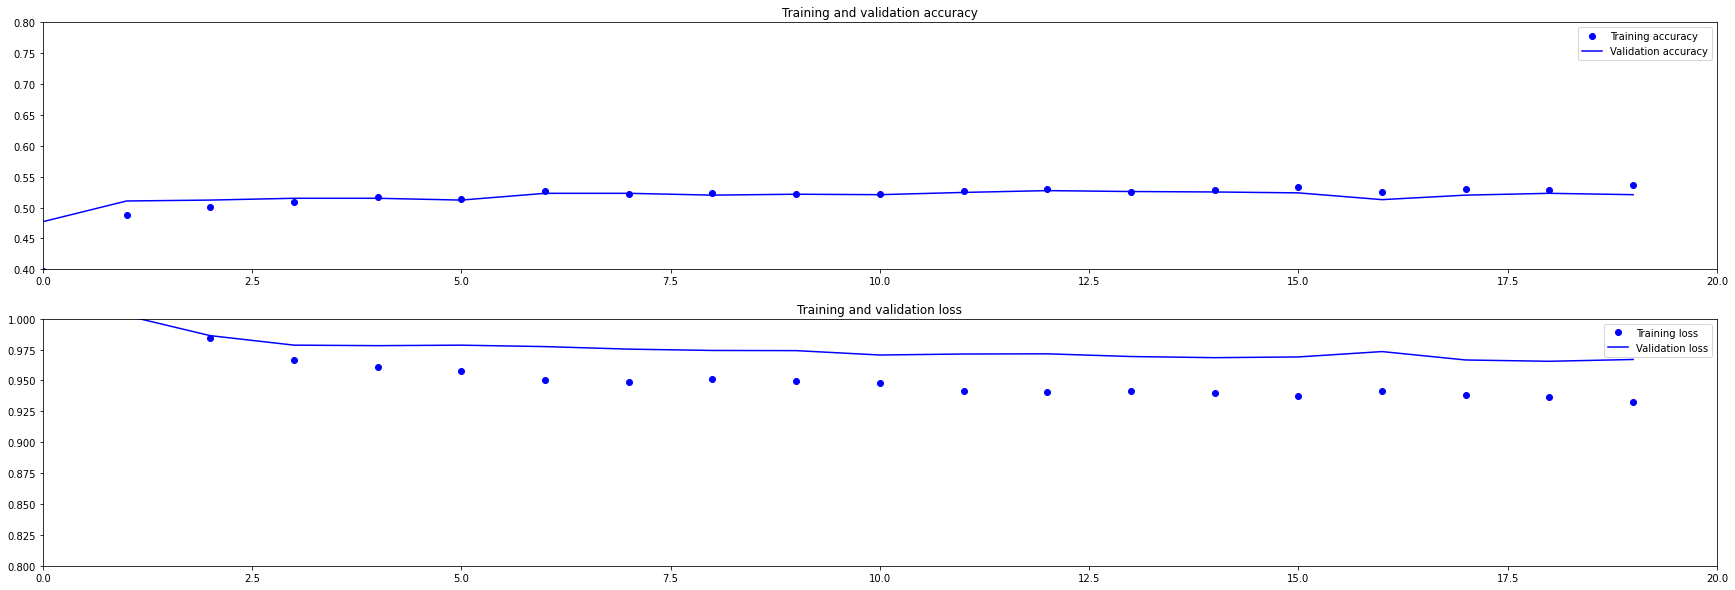

In [103]:
show_results(analysis,"W2V_CNN_100_3")